In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Recargar el archivo
file_path = "housing.csv"
df = pd.read_csv(file_path)

target = 'median_house_value'


### Crea una regresión lineal con cross validation

In [11]:
# Dummies y NAS
df = pd.get_dummies(df)
df['total_bedrooms'] = df['total_bedrooms'].fillna(df.total_bedrooms.mean())

In [12]:
# Define X, y
X = df.copy()
X = X.drop(target, axis = 1)

y = df[target]

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Entrenar modelo con interacciones
model = linear_model.LinearRegression().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_lineal = model.predict(X_test)
r2_score(y_pred=predicciones_lineal, y_true=y_test)


0.6395785380523766

In [18]:
## Crea una función de calibracion

def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones': predicciones,
        'y': y
    })
    
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q = bins, labels = False) + 1
    grouped = df_calibracion.groupby('bins').mean()
    
    plt.plot(grouped.predicciones, grouped.y, label = "Modelo", marker = "o")
    plt.plot(grouped.predicciones, grouped.predicciones, label = "Real", marker = "o")
    plt.grid()
    plt.legend()
    plt.xlabel("Predicción")
    plt.ylabel("Real")


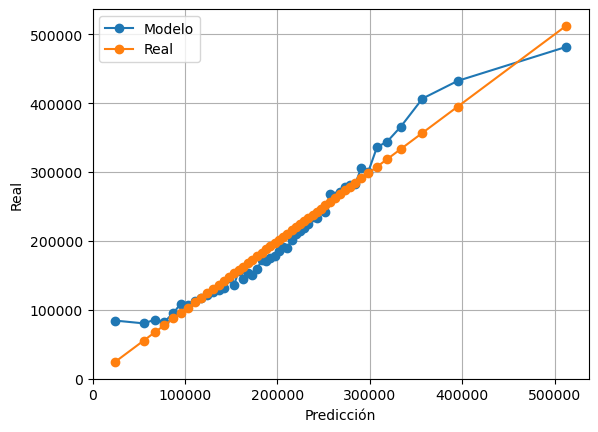

In [20]:
calibracion(predicciones_lineal, y_test, 50)

### Standard escaler

Escalar valor a media 0 y varianza 1


$Z = \frac{x - \mu}{\sigma}$


In [23]:
X_prueba = df[['total_rooms', 'median_income']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_prueba)
X_prueba_escalad = scaler.transform(X_prueba)
X_prueba.head()

,total_rooms,median_income
0,880.0,8.3252
1,7099.0,8.3014
2,1467.0,7.2574
3,1274.0,5.6431
4,1627.0,3.8462


In [25]:
X_prueba_escalad

array([[-0.8048191 ,  2.34476576],
       [ 2.0458901 ,  2.33223796],
       [-0.53574589,  1.7826994 ],
       ...,
       [-0.17499526, -1.14259331],
       [-0.35559977, -1.05458292],
       [ 0.06840827, -0.78012947]])

### Polinomio grado 2 y escalamiento

In [31]:

degree = 2

# Aplicar StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state = 42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly2 = model.predict(X_test)
r2_score(y_pred=predicciones_poly2, y_true=y_test)

0.6802055186033801

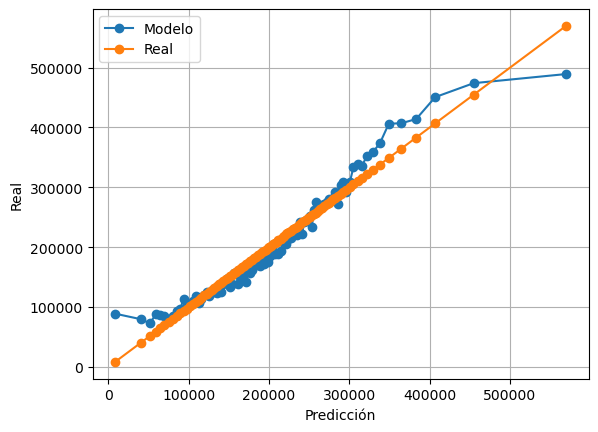

In [33]:
calibracion(predicciones_lineal, y_test, 100)

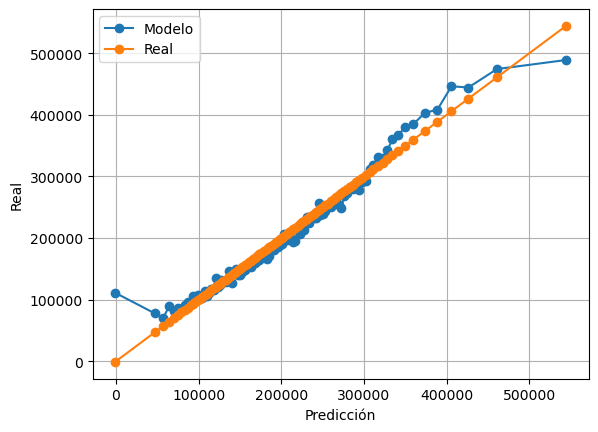

In [34]:
calibracion(predicciones_poly2, y_test, 100)

#### Polinomio grado 3

In [37]:

degree = 3

# Aplicar StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state = 42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly3 = model.predict(X_test)
r2_score(y_pred=predicciones_poly3, y_true=y_test) 


0.7280522302731641

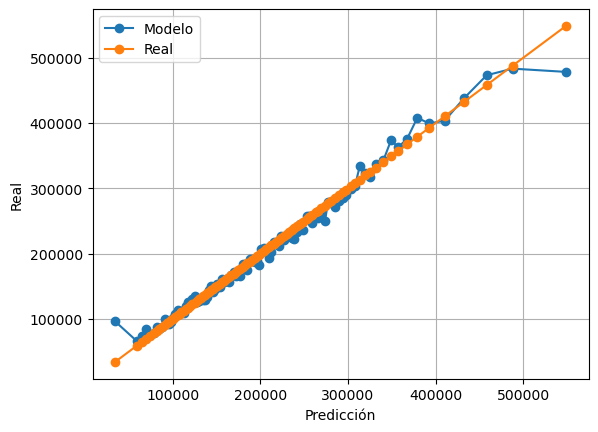

In [38]:
calibracion(predicciones_poly3, y_test, bins=100)

In [39]:
degree = 4

# Aplicar StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state = 42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly4 = model.predict(X_test)
r2_score(y_pred=predicciones_poly4, y_true=y_test) 

0.40499833352981207

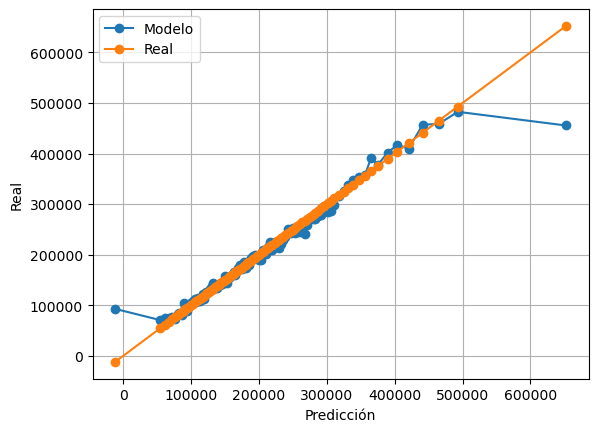

In [40]:
calibracion(predicciones_poly4, y_test, bins=100)

### Feature engenieering 

Per room
* Population per room
* Bedrooms per room

Per household
* Population per household
* Rooms per household
* Bedrooms per household

Per population
* Income per person
* Rooms per person

Transformaciones
* Logaritmo ingreso
* Raíz de total rooms 
* Median income **2 

In [57]:
#Per room
#Population per room
#Bedrooms per room

df['population_per_room'] = df['population'] / df['total_rooms']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

#Per household
#Population per household
#Rooms per household
#Bedrooms per household

df['population_per_household'] = df['population'] / df['households']
df['total_rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_household'] = df['total_bedrooms'] / df['households']

#Per population
#Income per person
#Rooms per person

df['median_income_per_person'] = df['median_income'] / df['population']
df['total_rooms_per_person'] = df['total_rooms'] / df['population']

#Transformaciones
#Logaritmo ingreso
#Raíz de total rooms
#Median income **2

df['log_income'] = np.log(df['median_income'])
df['sqrt_total_rooms'] = np.sqrt(df['total_rooms'])
df['median_income_2'] = df['median_income']**2

In [58]:
# Correlación 
df.corr()['median_house_value']

longitude                    -0.045967
latitude                     -0.144160
housing_median_age            0.105623
total_rooms                   0.134153
total_bedrooms                0.049454
population                   -0.024650
households                    0.065843
median_income                 0.688075
median_house_value            1.000000
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_INLAND       -0.484859
ocean_proximity_ISLAND        0.023416
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_besrooms                0.049454
population_per_room          -0.033557
bedrooms_per_room            -0.220049
population_per_households    -0.023737
total_rooms_per_households         NaN
population_per_household     -0.023737
total_rooms_per_household     0.151948
bedrooms_per_household       -0.044265
median_income_per_person      0.114455
total_rooms_per_person        0.209482
log_income                    0.651807
sqrt_total_rooms         

In [59]:
# Define los valores numericos
numerical_features= [i for i in df.keys() if 'ocean_proximity' not in i and i != 'median_house_value']



### Realiza un bivariado de las variables numericas

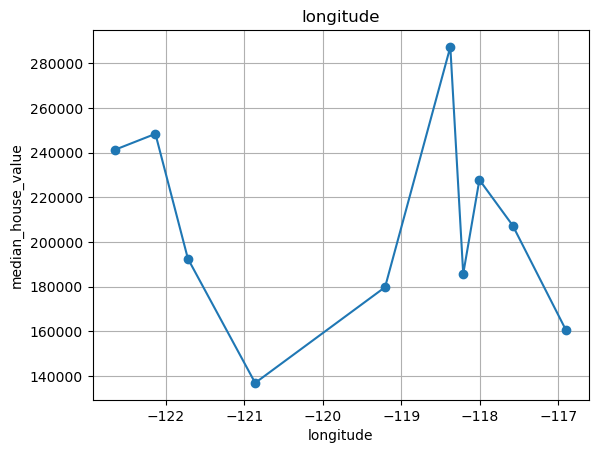

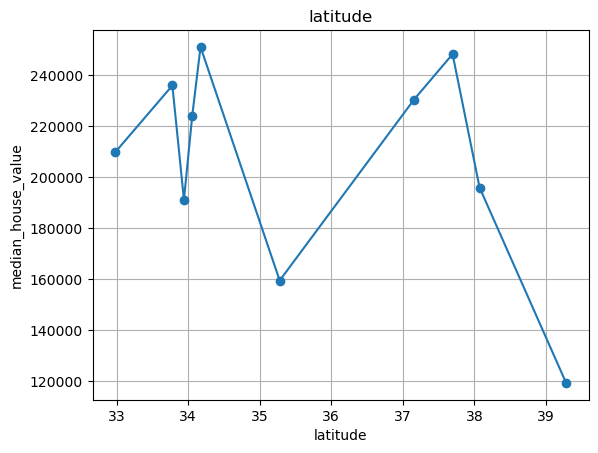

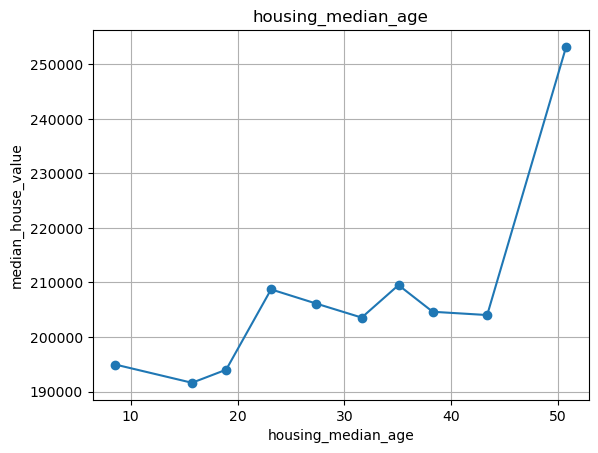

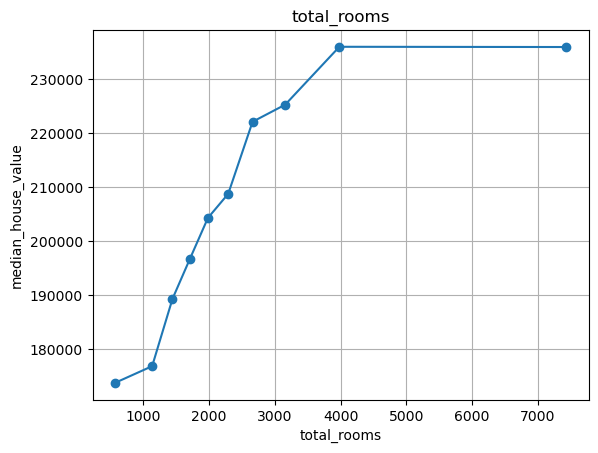

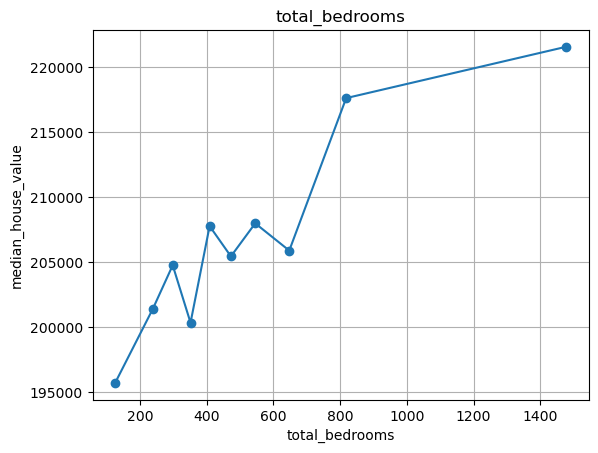

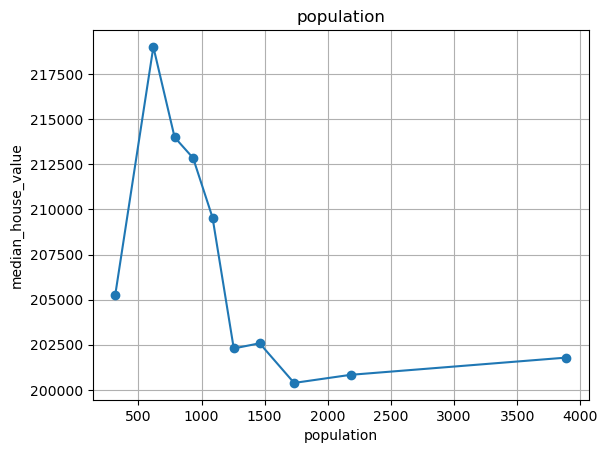

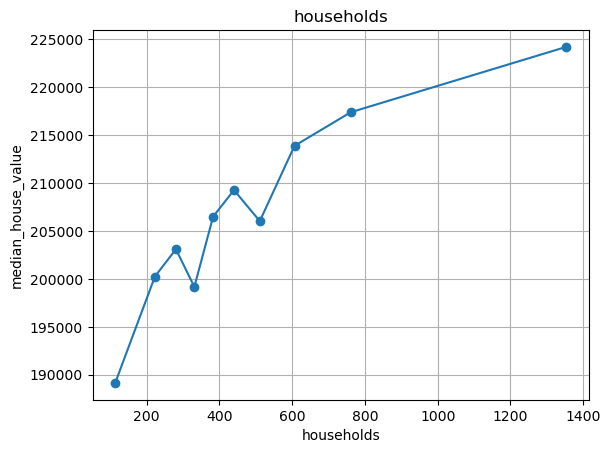

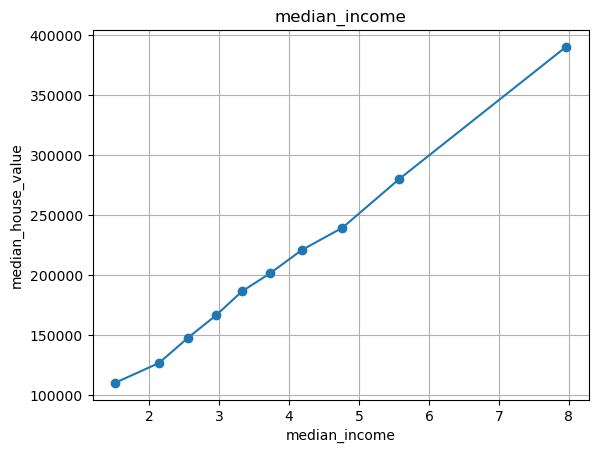

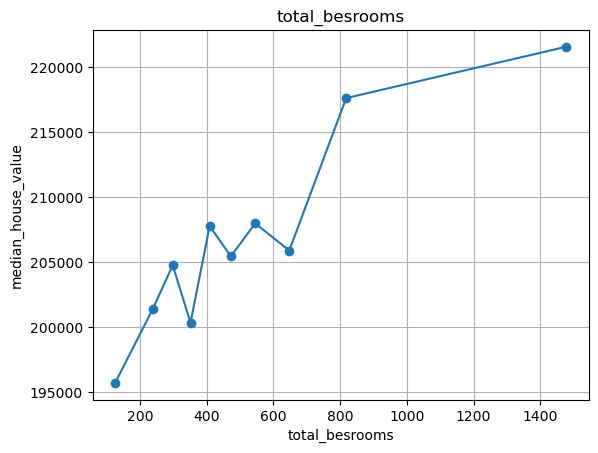

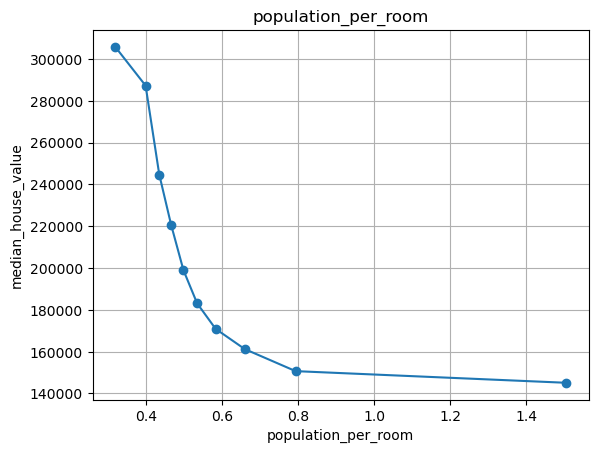

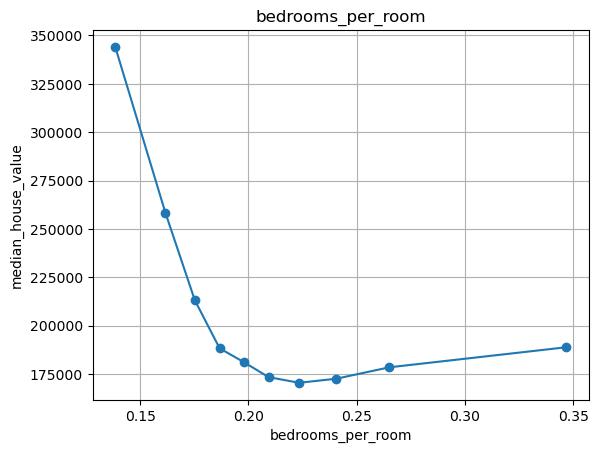

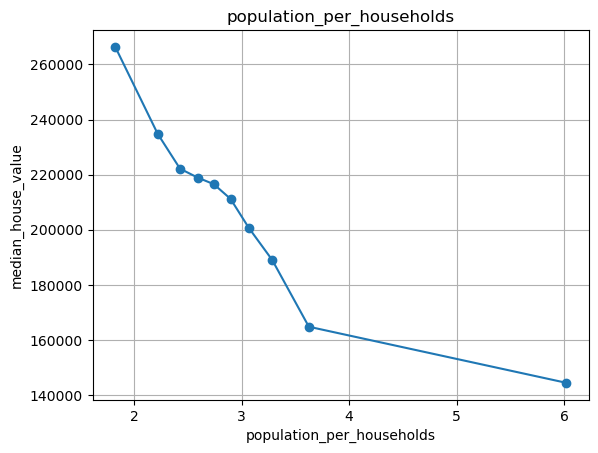

ValueError: Bin edges must be unique: array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [60]:
for i in numerical_features:
    if i != 'median_house_value':
        flag_df = df[[target, i]]
        flag_df['bins'] = pd.qcut(flag_df[i], q = 10, labels = False) + 1
        grouped = flag_df.groupby('bins').mean()
        plt.figure()
        plt.plot(grouped[i], grouped[target], marker = "o")
        plt.grid()
        plt.xlabel(i)
        plt.ylabel(target)
        plt.title(i)
        plt.show()    


### Regresion lineal feature eng

In [52]:
## vuelve a empezar
X = df.copy()
X = X.drop(target, axis = 1)
# Dummies

# Crear dataset con las variables seleccionadas


# Manejo de valores nulos (rellenar con la mediana)

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.LinearRegression().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_lineal2 = model.predict(X_test)
r2_score(y_pred=predicciones_lineal2, y_true=y_test) 


0.6153561293827403

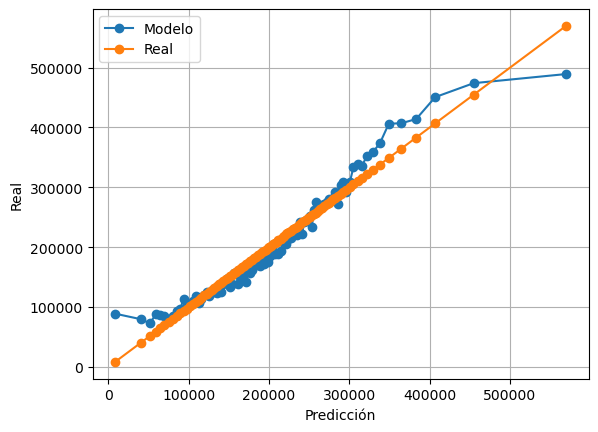

In [53]:
calibracion(predicciones_lineal, y_test, bins=100)

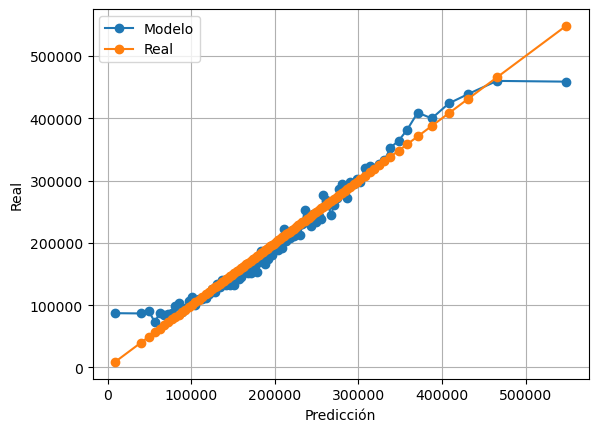

In [54]:
calibracion(predicciones_lineal2, y_test, bins=100)

### Regresion polinomial grado 2 feature eng 

In [11]:

degree = 2

# Aplicar StandardScaler

# Poli

# Ajustar el modelo de regresión lineal

# Predicicones


### Regresion polinomial grado 3 feature eng 

In [12]:

degree = 3

# Aplicar StandardScaler

# Ajustar el modelo de regresión lineal

# Prediccions


### Transformar numericos a categoricos 

In [16]:
# Numericos ni ocean_proximity ni median_house_value

# X = df.copy() y drop target


In [15]:
# División en conjunto de entrenamiento y prueba

# Crea funcion bins para las variables numericas 

# Aplica la foruma de bins a x_trian y x_test

# Bin features


# Final features 

# Apply get dummies to both pd.get_dummies(X_train[final_features], columns=bin_features, drop_first=True)

# Entrenar modelo con interacciones

